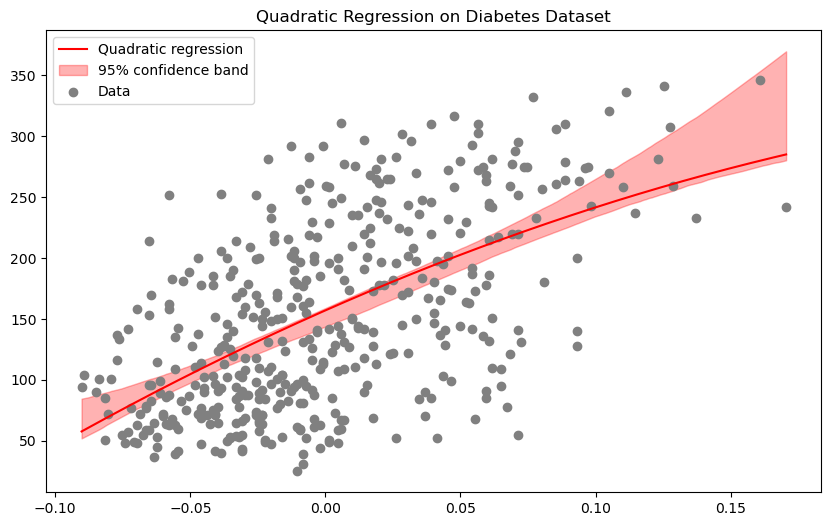

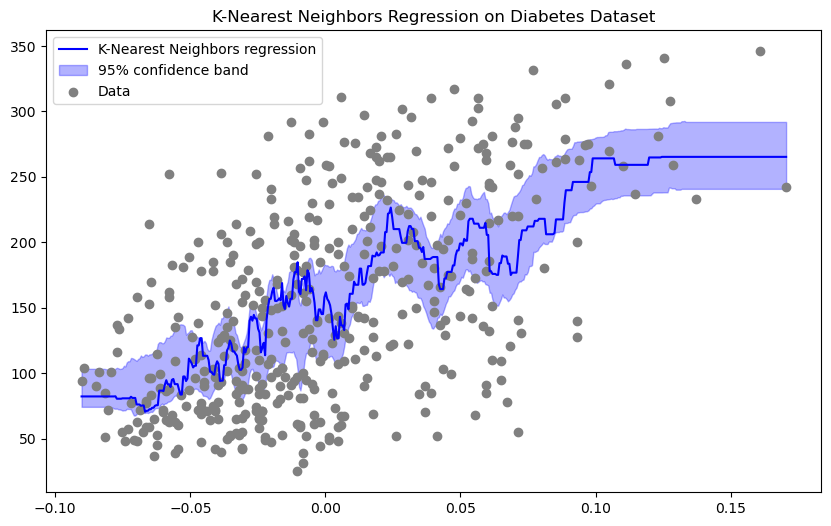

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data[:, 2:3]  # Using 'bmi' feature
Y = diabetes.target

# Quadratic Regression
quad_regressor = make_pipeline(PolynomialFeatures(2), LinearRegression())
quad_regressor.fit(X, Y)

# K-Nearest Neighbors Regression
knn_regressor = KNeighborsRegressor(n_neighbors=20)
knn_regressor.fit(X, Y)

# Creating uniform grid for prediction and plotting
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

n_bootstrap = 1000
alpha = 0.95
quad_preds = []
knn_preds = []

# Bootstrap
for _ in range(n_bootstrap):
    X_sample, Y_sample = resample(X, Y)

    # Fit and predict with each model
    quad_regressor.fit(X_sample, Y_sample)
    quad_preds.append(quad_regressor.predict(X_range).ravel())

    knn_regressor.fit(X_sample, Y_sample)
    knn_preds.append(knn_regressor.predict(X_range).ravel())

# Convert predictions to arrays
quad_preds = np.array(quad_preds)
knn_preds = np.array(knn_preds)

# Compute the percentiles of predictions for confidence bands
lower_quad = np.percentile(quad_preds, (1 - alpha) / 2 * 100, axis=0)
upper_quad = np.percentile(quad_preds, (alpha + (1 - alpha) / 2) * 100, axis=0)

lower_knn = np.percentile(knn_preds, (1 - alpha) / 2 * 100, axis=0)
upper_knn = np.percentile(knn_preds, (alpha + (1 - alpha) / 2) * 100, axis=0)

# Plotting Quadratic regression
plt.figure(figsize=(10, 6))
plt.plot(X_range, quad_regressor.predict(X_range), 'r', label='Quadratic regression')
plt.fill_between(X_range.ravel(), lower_quad, upper_quad, color='red', alpha=0.3, label='95% confidence band')
plt.scatter(X, Y, color='gray', label='Data')
plt.title("Quadratic Regression on Diabetes Dataset")
plt.legend()
plt.show()

# Plotting K-Nearest Neighbors regression
plt.figure(figsize=(10, 6))
plt.plot(X_range, knn_regressor.predict(X_range), 'b', label='K-Nearest Neighbors regression')
plt.fill_between(X_range.ravel(), lower_knn, upper_knn, color='blue', alpha=0.3, label='95% confidence band')
plt.scatter(X, Y, color='gray', label='Data')
plt.title("K-Nearest Neighbors Regression on Diabetes Dataset")
plt.legend()
plt.show()
